In [1]:
from ga_develop_ver2 import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Global parameter

elitism = 0.3
population_size = 5
mutation_rate = 0.8
mutation_sigma = 0.1
mutation_decay = 0.999
mutation_limit = 0.01
amount_optimisation_steps = 250
dna_bounds = (-5.11, 5.11)
dna_start_position = [4.8, 4.8]

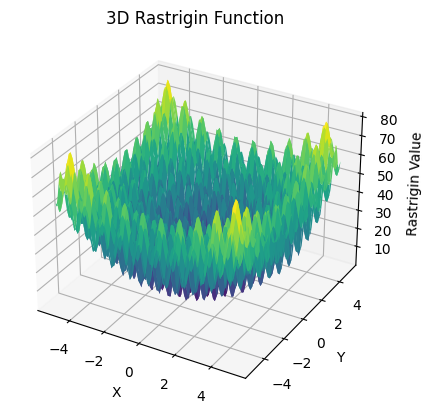

Input (x): 3.510420323978754
Input (y): -0.7808190959050618
Rastrigin Value: 40.98696168346182


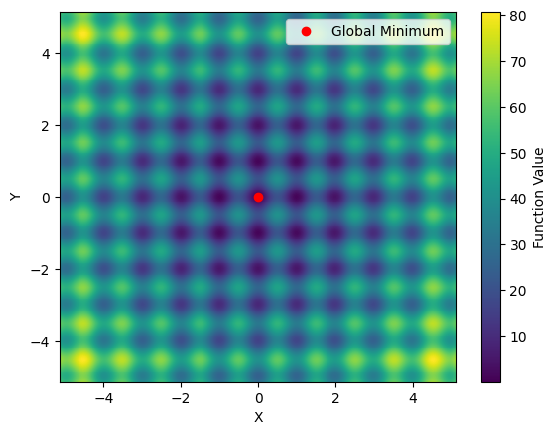

In [28]:
def rastrigin(x, y):
    A = 10
    sum_term = x**2 - A * np.cos(2 * np.pi * x) + y**2 - A * np.cos(2 * np.pi * y)
    return A * 2 + sum_term

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
x, y = np.meshgrid(x, y)
z = rastrigin(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Rastrigin Value')
ax.set_title('3D Rastrigin Function')

# Show the plot
plt.show()

# Generate random input values
x_input = np.random.uniform(-5.12, 5.12)
y_input = np.random.uniform(-5.12, 5.12)

# Calculate Rastrigin function output
output = rastrigin(x_input, y_input)

# Print the input values and the corresponding output
print(f"Input (x): {x_input}")
print(f"Input (y): {y_input}")
print(f"Rastrigin Value: {output}")

x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function Value')

plt.plot(0, 0, 'ro', label='Global Minimum')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



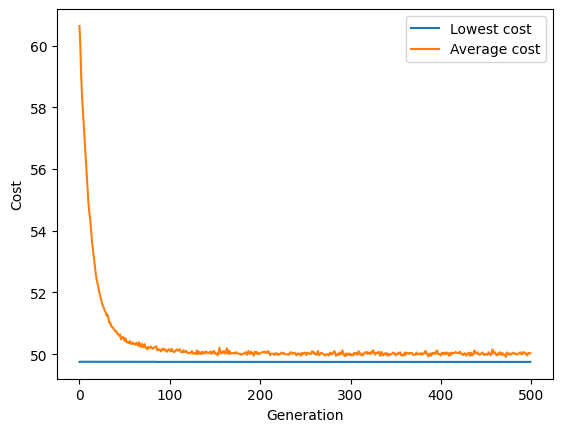

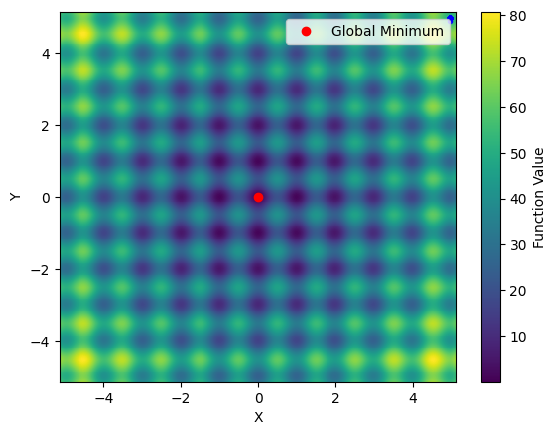

In [32]:
elitism = 0.1
population_size = 500
mutation_rate = 0.8
mutation_sigma = 0.1
mutation_decay = 0.999
mutation_limit = 0.01
amount_optimisation_steps = 500
dna_bounds = (-5.11, 5.11)
dna_start_position = [4.8, 4.8]

ga_validate = GA_version_2(
    dna_size=len(dna_start_position),
    dna_bounds=dna_bounds,
    dna_start_position=dna_start_position,
    elitism=elitism,
    population_size=population_size,
    mutation_rate=mutation_rate,
    mutation_sigma=mutation_sigma,
    mutation_decay=mutation_decay,
    mutation_limit=mutation_limit,
)

x = [ga_validate.population[i][0] for i in range(ga_validate.population_size)]
y = [ga_validate.population[i][1] for i in range(ga_validate.population_size)]

cost_array = np.array([rastrigin(x[i], x[i]) for i in range(ga_validate.population_size)])
dna_trajectory = []

assert len(cost_array) == ga_validate.population_size

for step in range(amount_optimisation_steps):
    best_dna, lowest_cost = ga_validate.evolve(cost_array)
    dna_trajectory.append(best_dna)

    x_new = [ga_validate.population[i][0] for i in range(ga_validate.population_size)]
    y_new = [ga_validate.population[i][1] for i in range(ga_validate.population_size)]    
    
    cost_array = np.array([rastrigin(x_new[i], y_new[i]) for i in range(ga_validate.population_size)])

    assert len(cost_array) == ga_validate.population_size

    if step % 10 == 0:
        # print("Step: %d, Lowest cost: %f" % (step, lowest_cost))
        # print("Best DNA:", best_dna)
        pass

    if step+1 == amount_optimisation_steps:
        ga_validate.plot()

        x_data = [dna_trajectory[i][0] for i in range(len(dna_trajectory))]
        y_data = [dna_trajectory[i][1] for i in range(len(dna_trajectory))]

        x = np.linspace(-5.12, 5.12, 400)
        y = np.linspace(-5.12, 5.12, 400)
        X, Y = np.meshgrid(x, y)
        Z = rastrigin(X, Y)

        plt.pcolormesh(X, Y, Z, cmap='viridis')
        plt.colorbar(label='Function Value')

        plt.plot(0, 0, 'ro', label='Global Minimum')
        plt.plot(x_data, y_data, '.b')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

        
        

In [9]:
ga = GA_version_2(
    dna_size=len(dna_start_position),
    dna_bounds=dna_bounds,
    dna_start_position=dna_start_position,
    elitism=elitism,
    population_size=population_size,
    mutation_rate=mutation_rate,
    mutation_sigma=mutation_sigma,
    mutation_decay=mutation_decay,
    mutation_limit=mutation_limit,
)

ga.population

array([[4.91606381, 4.95522583],
       [4.81053002, 4.82620781],
       [4.94465205, 4.65359541],
       [4.72308798, 4.81366232],
       [4.88960428, 4.74867975]])

In [3]:
cost_array = np.array([1,5,2,6,3,7,4,8,9,10])
cost_array_2 = np.array([1,5,2,6,3])

ga.execute(cost_array_2)

(array([4.86455286, 4.95241991]), 1)

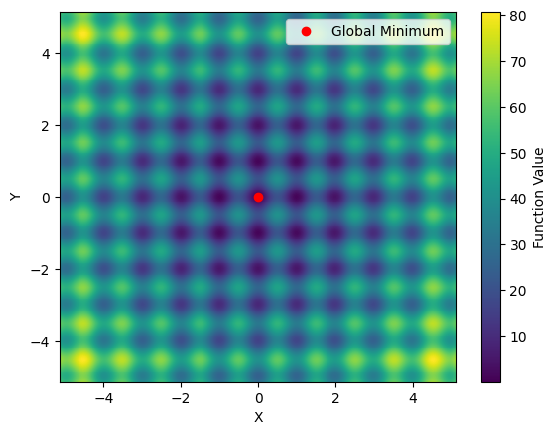